In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Position_Salaries.csv")

In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
X=df[['Level']]
y=df['Salary']

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model1=LinearRegression()

In [9]:
model1.fit(X,y)
y_pred=model1.predict(X)

In [10]:
from sklearn.metrics import r2_score,mean_squared_error
def model_performance(y_actual,y_pred):
  r2=r2_score(y_actual,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
  print("R2 score:{}|RMSE: {}".format(round(r2,2),round(RMSE,2)))

In [11]:
model_performance(y,y_pred)

R2 score:0.67|RMSE: 163388.74


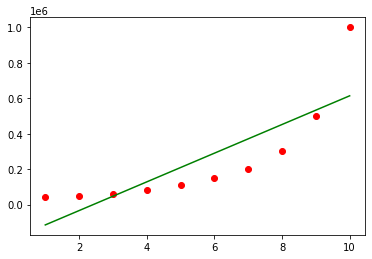

In [12]:
plt.scatter(X,y,color="red")
plt.plot(X,y_pred,color="green")

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
reg=PolynomialFeatures(degree=2)
X_poly=reg.fit_transform(X)

In [15]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [16]:
model2=LinearRegression()
model2.fit(X_poly,y)
y_pred_poly2=model2.predict(X_poly)

In [17]:
model_performance(y,y_pred_poly2)

R2 score:0.92|RMSE: 82212.12


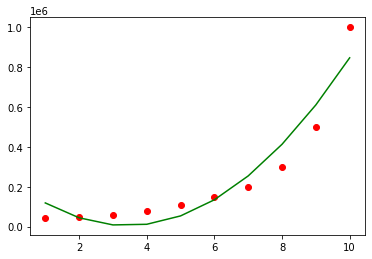

In [18]:
plt.scatter(X,y,color="red")
plt.plot(X,y_pred_poly2,color="green")

In [19]:
# degree 3

In [20]:
reg1=PolynomialFeatures(degree=3)
X_poly1=reg1.fit_transform(X)

In [21]:
X_poly1

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [22]:
model3=LinearRegression()
model3.fit(X_poly1,y)
y_pred_poly3=model3.predict(X_poly1)

In [23]:
model_performance(y,y_pred_poly3)

R2 score:0.98|RMSE: 38931.5


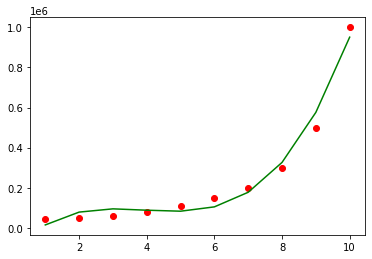

In [24]:
plt.scatter(X,y,color="red")
plt.plot(X,y_pred_poly3,color="green")

In [25]:
# Predicting Salary

In [26]:
model1.predict([[6.5]])

array([330378.78787879])

In [27]:
# degree2
model2.predict(reg.fit_transform([[6.5]]))

array([189498.10606061])

In [28]:
model3.predict(reg1.fit_transform([[6.5]]))

array([133259.46969697])

In [29]:
#boston dataset

In [30]:
from sklearn.datasets import load_boston

In [31]:
boston=load_boston()

In [32]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [33]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [34]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [35]:
df['Target']=boston.target

In [36]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [38]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

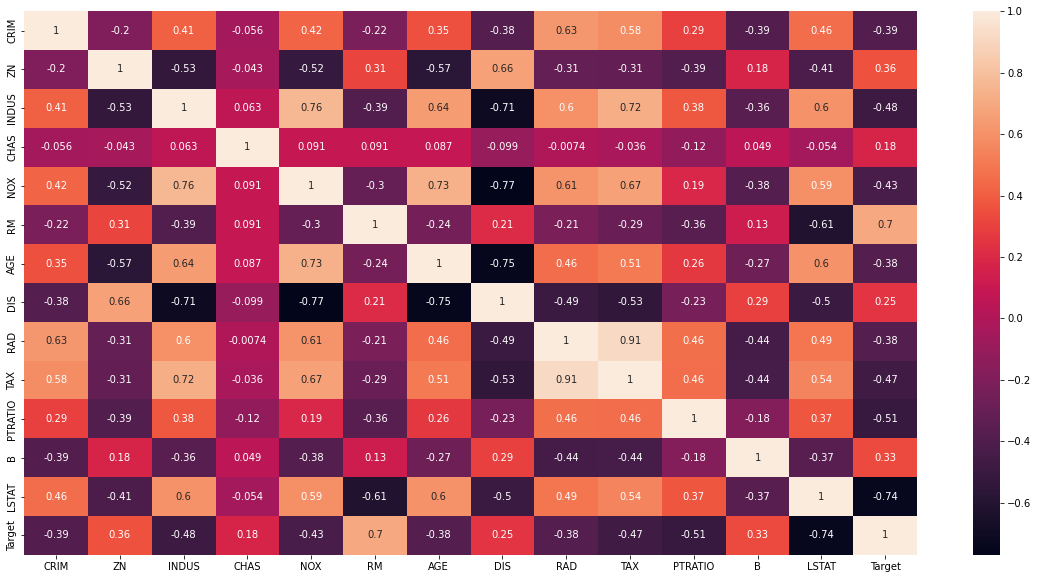

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [40]:
corr=df.corr()

In [41]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [42]:
corr1=corr.iloc[-1,:]

In [43]:
corr1[corr1>0.5]

RM        0.69536
Target    1.00000
Name: Target, dtype: float64

In [44]:
corr1[corr1<-0.5]

PTRATIO   -0.507787
LSTAT     -0.737663
Name: Target, dtype: float64

In [45]:
X=df[['RM','LSTAT']]
y=df['Target']

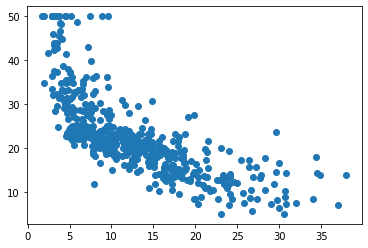

In [46]:
plt.scatter(df['LSTAT'],df['Target'])

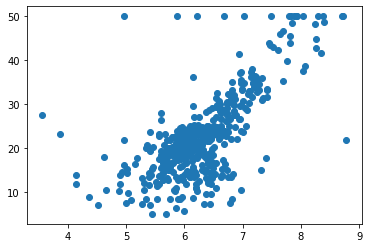

In [47]:
plt.scatter(df['RM'],df['Target'])

In [48]:
#Splitind dataset into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [49]:
X_train.shape

(404, 2)

In [50]:
X_test.shape

(102, 2)

In [51]:
y_train.shape

(404,)

In [52]:
y_test.shape

(102,)

In [53]:
import sklearn
#Model Building
from sklearn.linear_model import LinearRegression

In [54]:
mlr=LinearRegression()

In [55]:
mlr.fit(X_train,y_train)

LinearRegression()

In [56]:
y_train_pred=mlr.predict(X_train)
y_test_pred=mlr.predict(X_test)

In [57]:
from sklearn.metrics import r2_score,mean_squared_error
def model_performance(y_actual,y_pred):
    
  r2=r2_score(y_actual,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
  print("R2 score:{}|RMSE: {}".format(round(r2,2),round(RMSE,2)))


In [58]:
print("Train Performance")
model_performance(y_train,y_train_pred)
print("Test Performance")
model_performance(y_test,y_test_pred)

Train Performance
R2 score:0.67|RMSE: 5.27
Test Performance
R2 score:0.5|RMSE: 6.46


In [59]:
mlr.intercept_

-4.134683733841687

In [60]:
mlr.coef_

array([ 5.52547922, -0.63934589])

In [61]:
pd.DataFrame(mlr.coef_,X.columns,columns=["Coef"])

,Coef
RM,5.525479
LSTAT,-0.639346


In [62]:
mlr.coef_[0]

5.525479221734228

In [63]:
print("Predicted Target",round(mlr.predict([[6.5,5]])[0],2))

Predicted Target 28.58


In [64]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [65]:
X=df.iloc[:,:-1]
y=df['Target']

In [66]:
from sklearn.linear_model import Lasso,Ridge

In [67]:
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [68]:
#predicting train data
y_pred_train=ridge.predict(X_train)
#Predicting test
y_pred_test=ridge.predict(X_test)

In [69]:
model_performance(y_train,y_pred_train)
model_performance(y_test,y_pred_test)

R2 score:0.67|RMSE: 5.28
R2 score:0.5|RMSE: 6.42


In [70]:
Lasso=Lasso(alpha=10)
Lasso.fit(X_train,y_train)

Lasso(alpha=10)

In [71]:
#predicting train data
y_pred_train=Lasso.predict(X_train)
#Predicting test
y_pred_test=Lasso.predict(X_test)

In [72]:
model_performance(y_train,y_pred_train)
model_performance(y_test,y_pred_test)

R2 score:0.53|RMSE: 6.29
R2 score:0.48|RMSE: 6.54
